In [130]:
import pandas as pd

file_path = '/Users/hananalaskar/Documents/Code for Girls/data-science/ds-master/' 
df = pd.read_csv(file_path+'data_set/ds_salaries.csv')

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [131]:
df['job_title'].value_counts()[:6].index

Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist',
       'Data Science Manager'],
      dtype='object')

In [132]:
df.shape[0]

607

In [133]:
(143+132+97+41+16+12+11)/607

0.7446457990115322

In [134]:
list(df['job_title'].value_counts()[:10].index)

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer',
 'Research Scientist',
 'Data Science Manager',
 'Data Architect',
 'Big Data Engineer',
 'Machine Learning Scientist',
 'Principal Data Scientist']

In [135]:
df.loc[df['job_title'].isin( ['Data Scientist'] )]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


In [136]:
df.loc[df['job_title'].isin( list(df['job_title'].value_counts()[:10].index))]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [137]:
q_1 = df["salary_in_usd"].quantile(0.25)
q_3 = df["salary_in_usd"].quantile(0.75)
iqr = q_3 - q_1

l_q = q_1 - (1.5 * iqr)
h_q = q_1 + (1.5 * iqr)

df = df[(df["salary_in_usd"] > l_q) & (df["salary_in_usd"] < h_q) ]

In [138]:
df['salary_in_usd_bin'] = pd.cut(df['salary_in_usd'], 
#                                      labels=['extremely low', 'low', 'medium', 'high', 'extremely high'], 
#                                      bins=[0, 25000, 50000, 100000, 150000, 200000]
                                     labels=['low', 'medium', 'high'],
                                     bins=[0, 50000, 100000, 200000]

                                )

df[['salary_in_usd', 'salary_in_usd_bin']]

,salary_in_usd,salary_in_usd_bin
0,79833,medium
2,109024,high
3,20000,low
4,150000,high
5,72000,medium
...,...,...
601,52000,medium
602,154000,high
603,126000,high
604,129000,high


In [139]:
# To remove a column
df.drop(columns= ['salary', 'salary_currency', 'salary_in_usd', 'Unnamed: 0'], axis=1, inplace = True)
df

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_bin
0,2020,MI,FT,Data Scientist,DE,0,DE,L,medium
2,2020,SE,FT,Big Data Engineer,GB,50,GB,M,high
3,2020,MI,FT,Product Data Analyst,HN,0,HN,S,low
4,2020,SE,FT,Machine Learning Engineer,US,50,US,L,high
5,2020,EN,FT,Data Analyst,US,100,US,L,medium
...,...,...,...,...,...,...,...,...,...
601,2022,EN,FT,Data Analyst,CA,0,CA,M,medium
602,2022,SE,FT,Data Engineer,US,100,US,M,high
603,2022,SE,FT,Data Engineer,US,100,US,M,high
604,2022,SE,FT,Data Analyst,US,0,US,M,high


In [140]:
list(df['salary_in_usd_bin'].unique())

['medium', 'high', 'low']

# Encoder for categorical variables 

In [141]:
# Use encoder for categorical variables
label_encoder = LabelEncoder()
df_cat_col = df.columns[:]

# Update NaN values by NA
data_cat = df[df_cat_col]

# Loop through each categorical variable and update values using LabelEncoder
# - remove missing values in categorical columns
for i in range(len(data_cat.columns)):
    data_cat.iloc[:, i] = label_encoder.fit_transform(data_cat.iloc[:, i]) # DataFrame.iloc integer-location based indexing for selection by position.

df[df_cat_col] = data_cat

In [142]:
from sklearn.impute import SimpleImputer #Imputation transformer for completing missing values.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # LabelEncoder Encode target labels with value between 0 and n_classes-1  #OneHotEncoder Encode categorical features as a one-hot numeric array.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz  # Visualization

In [143]:
df.columns[:]

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salary_in_usd_bin'],
      dtype='object')

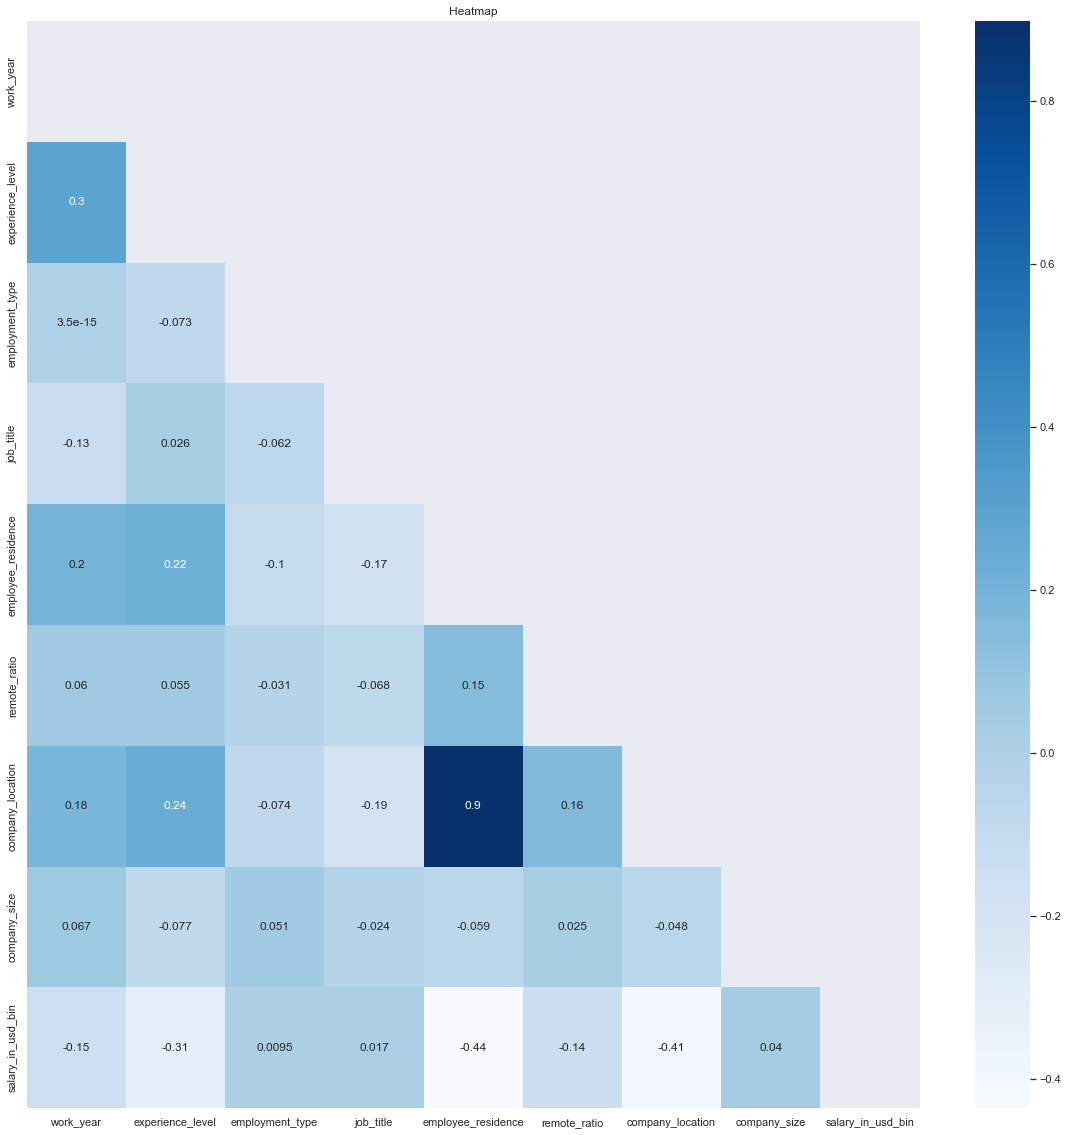

In [144]:
import numpy as np
import seaborn as sns
 
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr, cmap='Blues', annot=True, mask=mask).set_title('Heatmap');

# Predictive Modeling

In [145]:
# split dataset in features and target variable
features = df.loc[:, [
                      'work_year', 
                      'experience_level',
                      'employment_type', 
                      'job_title',
                       'employee_residence', 
                      'remote_ratio', 
                       'company_location',
                      'company_size'
                    ]].values

target = df.iloc[:, len(list(df.columns))-1].values

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(random_state=0, max_depth=8)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [146]:
clf.feature_importances_

array([0.06442807, 0.12965709, 0.0250753 , 0.15974277, 0.43408419,
       0.04206412, 0.08421431, 0.06073416])

# Predictive Evaluation

In [149]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 68.71165644171779


# Result Visualization

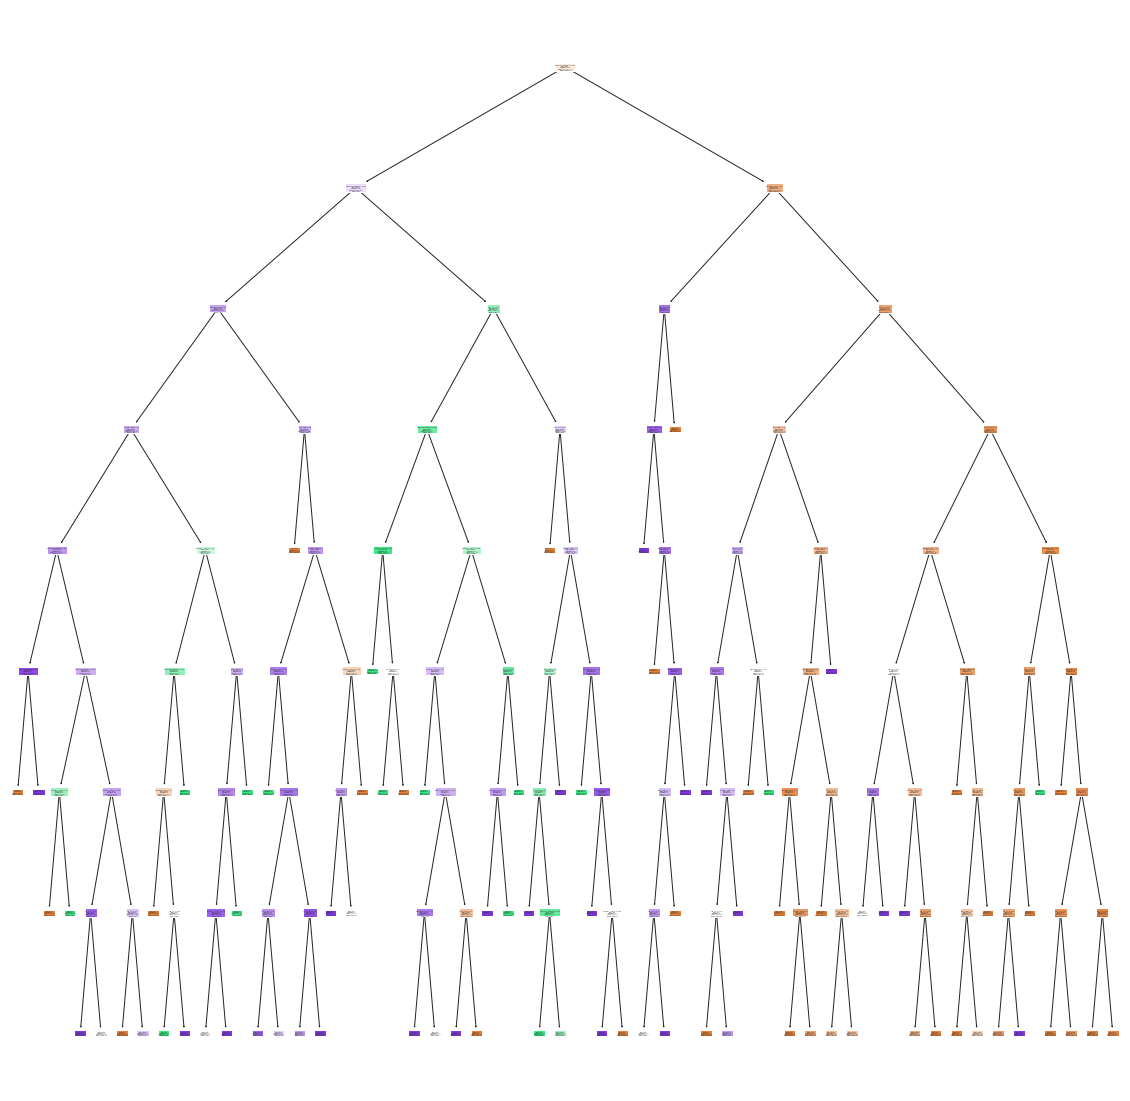

In [148]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure()
tree.plot_tree(clf,filled=True, feature_names = 
              ['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
                class_names=['medium', 'high', 'low'])  
plt.savefig('activity_tree.eps',format='eps',bbox_inches = "tight")